In [16]:
# libraries
import pandas as pd
import seaborn as sns
sns.set_style("white")

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import joypy

from matplotlib import cm

%matplotlib inline

# DATA

In [17]:
#final dataset September 2020
df = pd.read_csv('/Users/isabelle/Dropbox/_Github_reps/DGRP_SSDSSP/Data/df_sub01.csv')

## Variables

In [18]:
list(df.columns)

['id',
 'line',
 'block',
 'day',
 'sex',
 'wing',
 'leg',
 'pupa',
 'group',
 'pupa_noblock']

In [19]:
df.head()

,id,line,block,day,sex,wing,leg,pupa,group,pupa_noblock
0,021-A-0-F-085,L21,B6,D0,F,14.230397,13.932526,14.707787,L21_F_D0,0.310649
1,021-A-0-F-086,L21,B6,D0,F,13.998666,13.654423,14.430946,L21_F_D0,0.033808
2,021-A-0-F-087,L21,B6,D0,F,13.918941,13.564935,14.467345,L21_F_D0,0.070207
3,021-A-0-F-088,L21,B6,D0,F,13.933912,13.756485,14.421471,L21_F_D0,0.024333
4,021-A-0-F-089,L21,B6,D0,F,14.210659,13.863387,14.661763,L21_F_D0,0.264625


Dataset already prepared for pupae measurement and block effect removed.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15394 non-null  object 
 1   line          15394 non-null  object 
 2   block         15394 non-null  object 
 3   day           15394 non-null  object 
 4   sex           15394 non-null  object 
 5   wing          14952 non-null  float64
 6   leg           14877 non-null  float64
 7   pupa          15394 non-null  float64
 8   group         15394 non-null  object 
 9   pupa_noblock  15394 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


# Section 1

## Question 1

In [21]:
#subset fed
df0 = df[(df['day']=="D0")]

In [22]:
df0.head()

,id,line,block,day,sex,wing,leg,pupa,group,pupa_noblock
0,021-A-0-F-085,L21,B6,D0,F,14.230397,13.932526,14.707787,L21_F_D0,0.310649
1,021-A-0-F-086,L21,B6,D0,F,13.998666,13.654423,14.430946,L21_F_D0,0.033808
2,021-A-0-F-087,L21,B6,D0,F,13.918941,13.564935,14.467345,L21_F_D0,0.070207
3,021-A-0-F-088,L21,B6,D0,F,13.933912,13.756485,14.421471,L21_F_D0,0.024333
4,021-A-0-F-089,L21,B6,D0,F,14.210659,13.863387,14.661763,L21_F_D0,0.264625


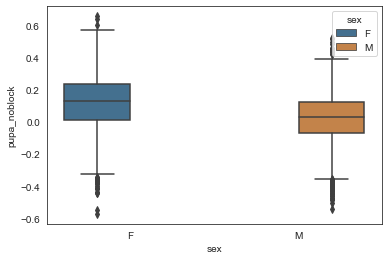

In [23]:
# make box plot of male and female wing size
sns.boxplot(x = 'sex', y = 'pupa_noblock', data=df0, hue='sex', saturation=.5)
plt.show()

# Testing genetic variation of SSD

In [42]:
df.head()

,id,line,block,day,sex,wing,leg,pupa,group,pupa_noblock
0,021-A-0-F-085,L21,B6,D0,F,14.230397,13.932526,14.707787,L21_F_D0,0.310649
1,021-A-0-F-086,L21,B6,D0,F,13.998666,13.654423,14.430946,L21_F_D0,0.033808
2,021-A-0-F-087,L21,B6,D0,F,13.918941,13.564935,14.467345,L21_F_D0,0.070207
3,021-A-0-F-088,L21,B6,D0,F,13.933912,13.756485,14.421471,L21_F_D0,0.024333
4,021-A-0-F-089,L21,B6,D0,F,14.210659,13.863387,14.661763,L21_F_D0,0.264625


In [44]:

import statsmodels.formula.api as smf
#fit the model
mixed = smf.mixedlm("pupa ~ sex",df, groups = df["line","block"], re_formula=1)
mixed_fit = mixed.fit()
#print the summary
print(mixed_fit.summary())
    


KeyError: ('line', 'block')

In [41]:
# calculate mean size of pupa by sex and line for Day 0
df_mean = df.groupby(['line','sex','day'], as_index=False).pupa_noblock.mean()
df_mean.head()

,line,sex,day,pupa_noblock
0,L100,F,D0,0.236366
1,L100,F,D1,0.047347
2,L100,M,D0,0.097791
3,L100,M,D1,0.036625
4,L101,F,D0,0.081565


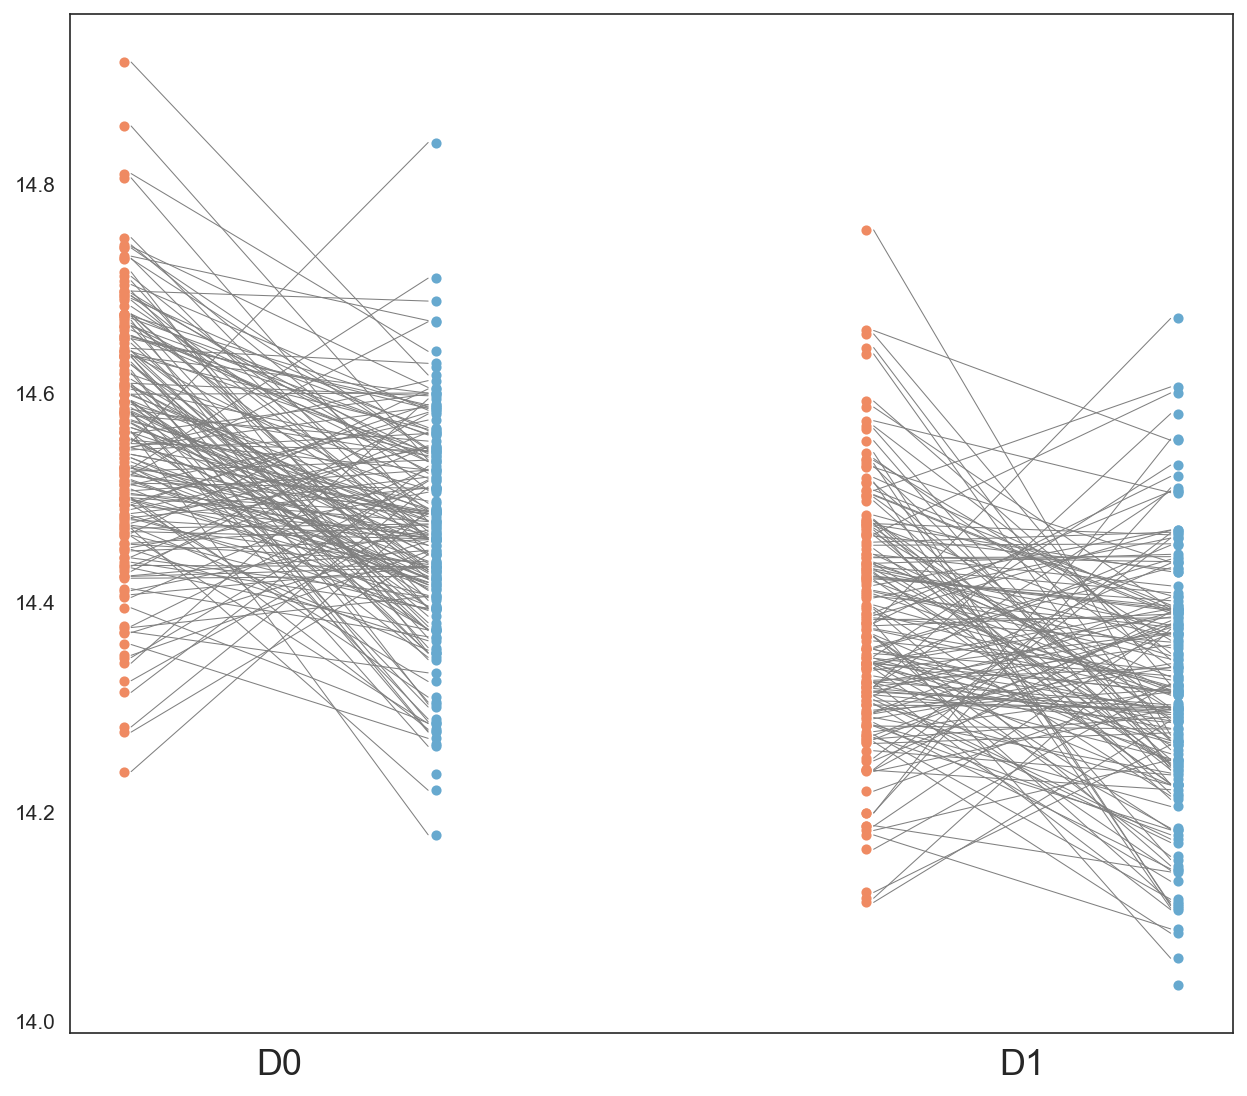

In [39]:
fig, ax = plt.subplots(figsize=(10, 9))

# Set up list to track sites
days = []
i = 1.0
for day, subdf in df_mean.groupby('day'):
    days.append(day)
    # Get the values for healthy and disease patients
    F = subdf.query('sex == "F"')['pupa_noblock'].values
    M = subdf.query('sex == "M"')['pupa_noblock'].values
    

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Plot the lines connecting the dots
    for Fi, Mi in zip(F,M):
        ax.plot([x1, x2], [ Fi, Mi], c='gray',linewidth=0.5)

    # Plot the points
    ax.scatter(len(F)*[x1-0.01], F, c='#ef8a62',
               s=15, label='Male')
    ax.scatter(len(M)*[x2+0.01], M, c='#67a9cf',
               s=15, label='Female')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels(days, fontsize='xx-large')


In [38]:
# calculate mean size of pupa by sex and line for Day 0
df_mean = df.groupby(['line','sex','day'], as_index=False).pupa_noblock.mean()
df_mean.head()

In [31]:
#subset female and day of starvation 0
df0_mean_F = df_mean[(df_mean['sex'] == "F") & (df_mean['day'] == "D0")]
#subset male and day of starvation 0
df0_mean_M = df_mean[(df_mean['sex'] == "M") & (df_mean['day'] == "D0")]

In [40]:
df0_mean_F['lnpupa_14'] = df_exp_mean_F['lnpupa']-14
df0_mean_M['lnpupa_14'] = df_exp_mean_M['lnpupa']-14

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
## Plots

In [34]:
#figure parameters
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=150
plt.rcParams['figure.figsize']=7.375, 3.5


In [37]:
#plotting mean size female fed compared to male PUPA and 0 day starvation
sns.barplot(x = 'line', y = 'pupa', data=df0_mean_F, order=df0_mean_F.sort_values('pupa').line, color="red", saturation=.5)
sns.despine(bottom = True, left = True)
sns.barplot(x = 'line', y = 'pupa', data=df0_mean_M, order=df0_mean_F.sort_values('pupa').line, color="blue", saturation=.5)
sns.despine(bottom = True, left = True)

plt.show()

KeyError: 'pupa'

# Sexual Size Dimorphism in each treatment

In [44]:
## calculate SSD for each treatment


# 1.subset by day of starvation
dfexp0= df_exp_mean[(df_exp_mean['day_of_starvation']==0)]
dfexp1= df_exp_mean[(df_exp_mean['day_of_starvation']==1)]
dfexp2= df_exp_mean[(df_exp_mean['day_of_starvation']==2)]

# 2. subsetting by sex and check how many unique lineages per sex, select unique lineages from the sex that has less
dfexp0M = dfexp0[(dfexp0['sex']=='M')]
dfexp0F = dfexp0[(dfexp0['sex']=='F')]

dfexp1M = dfexp1[(dfexp1['sex']=='M')]
dfexp1F = dfexp1[(dfexp1['sex']=='F')]

dfexp2M = dfexp2[(dfexp2['sex']=='M')]
dfexp2F = dfexp2[(dfexp2['sex']=='F')]

In [45]:
# 2. for each day of starvation, make a look to calculate SSD

## day starvation 0
lineage0 = set(np.unique(dfexp0M['line'])) & set(np.unique(dfexp0F['line']))
ssd0_list = []
lineage0_list = []
# subset by lineage

#loop
for i in lineage:

    lineage0_list.append(i)

    M0 = dfexp0M[(dfexp0M['line'] == i)]

    wingM0 = M0['lnpupa'].values[0]

    F0 = dfexp0F[(dfexp0F['line'] == i)]
    wingF0 = F0['lnpupa'].values[0]

    ssd0_list.append(wingF0-wingM0)


NameError: name 'lineage' is not defined

In [ ]:
## day starvation 1
lineage1 = set(np.unique(dfexp1M['line'])) & set(np.unique(dfexp1F['line']))
#print(lineage1)

ssd1_list = []
lineage1_list = []
# subset by lineage

#loop
for i in lineage1:
    lineage1_list.append(i)

    M1 = dfexp1M[(dfexp1M['line'] == i)]
 
    wingM1 = M1['lnpupa'].values[0]

    F1 = dfexp1F[(dfexp1F['line'] == i)]
    wingF1 = F1['lnpupa'].values[0]

    ssd1_list.append(wingF1-wingM1)


In [ ]:
## day starvation 2
lineage2 = set(np.unique(dfexp2M['line'])) & set(np.unique(dfexp2F['line']))

ssd2_list = []
lineage2_list = []
# subset by lineage

#loop
for i in lineage2:

    lineage2_list.append(i)

    M2 = dfexp2M[(dfexp2M['line'] == i)]
    wingM2 = M2['lnpupa'].values[0]

    F2 = dfexp2F[(dfexp2F['line'] == i)]
    wingF2 = F2['lnpupa'].values[0]

    ssd2_list.append(wingF2-wingM2)


In [ ]:
#combine lists
SSD_0 = {'line':lineage0_list,'SSD0_pupa':ssd0_list} #Female - Male
SSD_1 = {'line':lineage1_list,'SSD1_pupa':ssd1_list} #Female - Male
SSD_2 = {'line':lineage2_list,'SSD2_pupa':ssd2_list} #Female - Male
#change to df
SSD0df = pd.DataFrame(SSD_0)
SSD1df = pd.DataFrame(SSD_1)
SSD2df = pd.DataFrame(SSD_2)

In [ ]:
SSD01df = SSD0df.merge(SSD1df, how = 'outer')
SSD012df = SSD01df.merge(SSD2df, how = 'outer')
SSD012df 

In [ ]:
#figure parameters
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=150
plt.rcParams['figure.figsize']=7.375, 3.5


In [ ]:
#plotting SSD fed PUPA and 1 day starvation
sns.barplot(x = 'line', y = 'SSD0_pupa', data=SSD012df, order=SSD012df.sort_values('SSD0_pupa').line, color="blue", saturation=.5)
sns.despine(bottom = True, left = True)
sns.barplot(x = 'line', y = 'SSD1_pupa', data=SSD012df, order=SSD012df.sort_values('SSD0_pupa').line, color="red", saturation=.5)
sns.despine(bottom = True, left = True)

plt.show()

In [ ]:
#plotting SSD fed PUPA and 2 day starvation

sns.barplot(x = 'line', y = 'SSD0_pupa', data=SSD012df, order=SSD012df.sort_values('SSD0_pupa').line, color="blue", saturation=.5)
sns.despine(bottom = True, left = True)

sns.barplot(x = 'line', y = 'SSD2_pupa', data=SSD012df, order=SSD012df.sort_values('SSD0_pupa').line, color="yellow", saturation=.5)
sns.despine(bottom = True, left = True)
sns.despine(bottom = True, left = True)

plt.show()

#### I want to see if female pupa size varies a lot

In [48]:
# distribution of pupal size by sex
df_exp_fed_mean_F.head()

NameError: name 'df_exp_fed_mean_F' is not defined

In [51]:
# plot of female size against male size
dfexp0_F = dfexp0[(dfexp0['sex']=="F")]
dfexp0_F.rename(columns={'lnpupa':'F'}, inplace=True)

dfexp0_F.head()

dfexp0_M = dfexp0[(dfexp0['sex']=="M")]
dfexp0_M.rename(columns={'lnpupa':'M'}, inplace=True)



pupa = pd.merge(dfexp0_F, dfexp0_M, on ='line', how = 'outer')
pupa.head(30)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,line,sex_x,day_of_starvation_x,F,sex_y,day_of_starvation_y,M
0,21,F,0,14.456279,M,0,14.540044
1,26,F,0,14.675364,M,0,14.559698
2,28,F,0,14.664133,M,0,14.598840
3,31,F,0,14.653472,M,0,14.508675
4,32,F,0,14.520754,M,0,14.376655
5,38,F,0,14.498479,M,0,14.459666
6,41,F,0,14.404523,M,0,14.278504
7,42,F,0,14.673466,M,0,14.561168
8,45,F,0,14.313798,M,0,14.220225
9,48,F,0,14.665619,M,0,14.602858


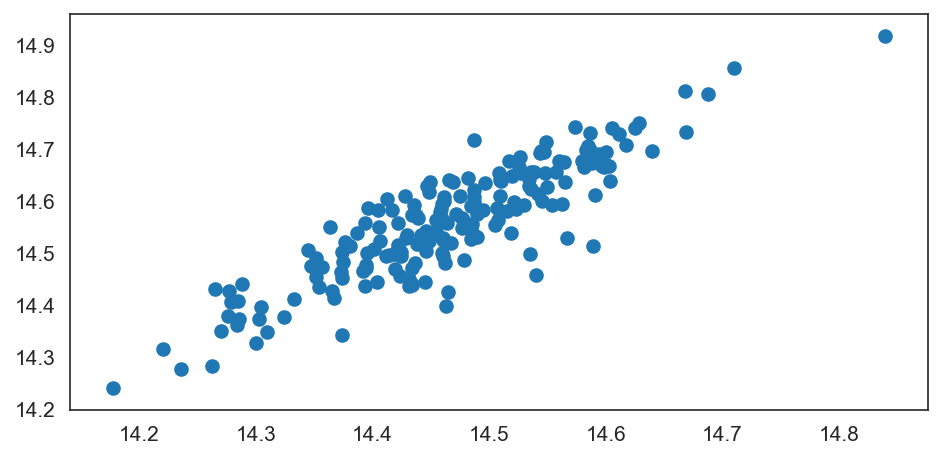

In [52]:
#plot
plt.scatter(pupa['M'] , pupa['F'])
plt.show()

In [53]:
#percent change between female and male size per lineage

pupa.head()

,line,sex_x,day_of_starvation_x,F,sex_y,day_of_starvation_y,M
0,21,F,0,14.456279,M,0,14.540044
1,26,F,0,14.675364,M,0,14.559698
2,28,F,0,14.664133,M,0,14.598840
3,31,F,0,14.653472,M,0,14.508675
4,32,F,0,14.520754,M,0,14.376655


In [73]:
pupa['percentdiff'] = (np.exp(pupa['F'])-np.exp(pupa['M']))/np.exp(pupa['M'])*100
pupa['SSD'] = pupa['F']- pupa['M']

In [74]:
pupa.head()

,line,sex_x,day_of_starvation_x,F,sex_y,day_of_starvation_y,M,percentdiff,SSD
0,21,F,0,14.456279,M,0,14.540044,-8.035243,-0.083765
1,26,F,0,14.675364,M,0,14.559698,12.262054,0.115666
2,28,F,0,14.664133,M,0,14.598840,6.747160,0.065293
3,31,F,0,14.653472,M,0,14.508675,15.580433,0.144796
4,32,F,0,14.520754,M,0,14.376655,15.499935,0.144100


In [77]:
pupa[['F','M','SSD']].describe()

,F,M,SSD
count,191.000000,190.000000,190.000000
mean,14.557859,14.465665,0.091717
std,0.112527,0.101203,0.052903
min,14.238073,14.177703,-0.083765
25%,14.482800,14.405798,0.061852
50%,14.562269,14.461738,0.092325
75%,14.638207,14.535428,0.127768
max,14.916051,14.839232,0.228233


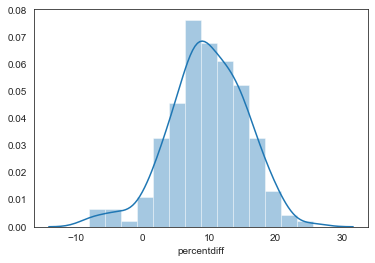

In [68]:
sns.distplot(pupa['percentdiff'])

In [70]:
#test for variance equality
dfexp0_F = dfexp0[(dfexp0['sex']=='F')]
dfexp0_M = dfexp0[(dfexp0['sex']=='M')]

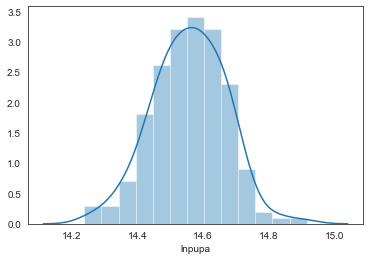

In [71]:
sns.distplot(dfexp0_F['lnpupa'])

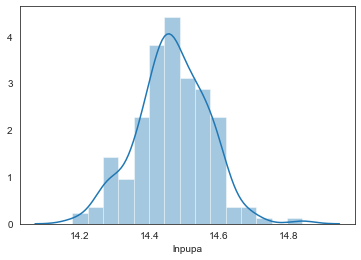

In [72]:
sns.distplot(dfexp0_M['lnpupa'])

Multi Linear Regression Male, female and SSD

,F,M,SSD
count,191.000000,190.000000,190.000000
mean,14.557859,14.465665,0.091717
std,0.112527,0.101203,0.052903
min,14.238073,14.177703,-0.083765
25%,14.482800,14.405798,0.061852
50%,14.562269,14.461738,0.092325
75%,14.638207,14.535428,0.127768
max,14.916051,14.839232,0.228233


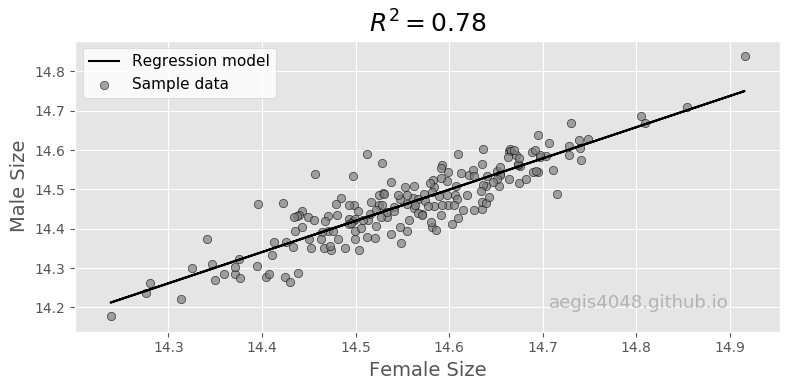

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

######################################## Data preparation #########################################

X = pupa['F'].values.reshape(-1,1)
y = pupa['M'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Male Size', fontsize=14)
ax.set_xlabel('Female Size', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################
pupa = pupa.dropna()
X = pupa[['F', 'M']].values.reshape(-1,2)
Y = pupa['SSD']



In [159]:
######################## Prepare model data point for visualization ###############################

x = X[:, 0] #x is female size
y = X[:, 1] #m is male size
z = Y    #z is SSD

x_pred = np.linspace(14, 15)      # range of F size
y_pred = np.linspace(14, 15)  # range of M size


In [160]:
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


In [161]:
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)



In [162]:
############################################## Evaluate ############################################

r2 = model.score(X, Y)

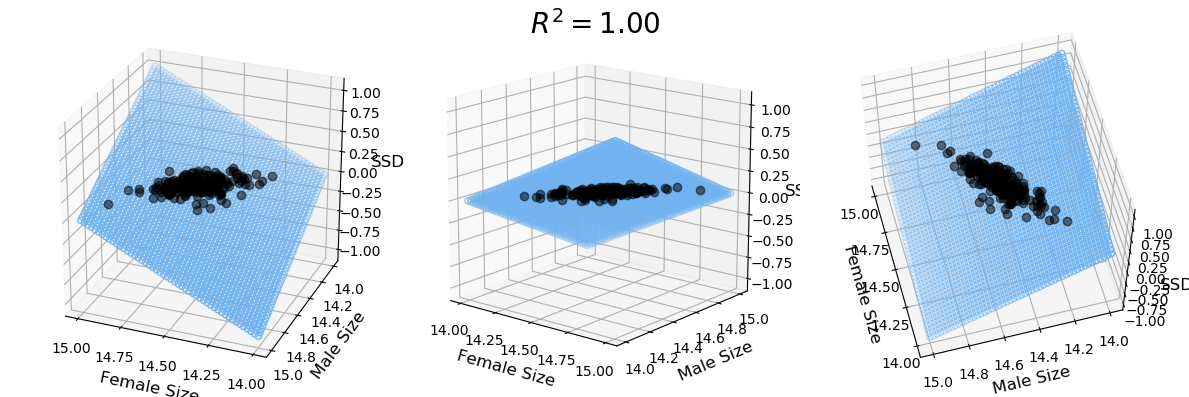

In [163]:


############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Female Size', fontsize=12)
    ax.set_ylabel('Male Size', fontsize=12)
    ax.set_zlabel('SSD', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32,' ', fontsize=13, ha='center', va='center',transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, ' ', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, ' ', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [92]:
#wingF = df_exp_fed_F['lnwing'].to_numpy()
#wingF = wingF[~numpy.isnan(wingF)]
#wingF
#wingM = df_exp_fed_M['lnwing'].to_numpy()
#wingM

NameError: name 'numpy' is not defined

In [91]:
stats.ttest_ind(wingF, wingM) # not working, need to figure out why

Ttest_indResult(statistic=nan, pvalue=nan)

In [41]:

#levene(df_exp_fed.lnwing, df_exp_fed_M.lnwing)

NameError: name 'levene' is not defined

In [44]:
#calculate average wing size by sex by line
df_exp_fed_groupmean = df_exp_fed.groupby(['line','sex'], as_index=False).mean()


In [81]:
df_exp_fed_groupmean

,line,sex,block,day_of_starvation,wing,cell,leg,legpow2,lnwing,lnleg,lnlegpow2
0,21,F,6.000000,0.745455,1.220906e+06,62.611111,936.331992,883648.257572,14.003323,6.837838,13.675676
1,21,M,6.000000,0.717391,1.063088e+06,67.266667,935.150238,880995.611202,13.864271,6.836921,13.673843
2,26,F,13.000000,0.951456,1.217339e+06,64.932039,899.288881,817371.773515,13.998656,6.796231,13.592462
3,26,M,13.000000,0.990099,1.022200e+06,73.376238,881.632186,782733.385475,13.827928,6.778255,13.556510
4,28,F,12.487805,1.195122,1.371723e+06,78.829268,983.513289,973445.399450,14.120568,6.888005,13.776009
...,...,...,...,...,...,...,...,...,...,...,...
381,908,M,7.000000,0.541667,9.367352e+05,89.916667,835.003454,702368.903643,13.736779,6.723720,13.447440
382,911,F,7.000000,0.940000,9.099719e+05,73.280000,808.518900,658519.468726,13.707247,6.691541,13.383083
383,911,M,7.000000,0.740000,7.857910e+05,81.140000,797.469909,639933.303412,13.564708,6.678310,13.356620
384,913,F,7.000000,1.071429,1.145185e+06,65.785714,927.614871,868647.906027,13.930377,6.827921,13.655843


In [ ]:
#Histogram showing the distribution of mean size female and mean size male

<Figure size 1280x800 with 0 Axes>

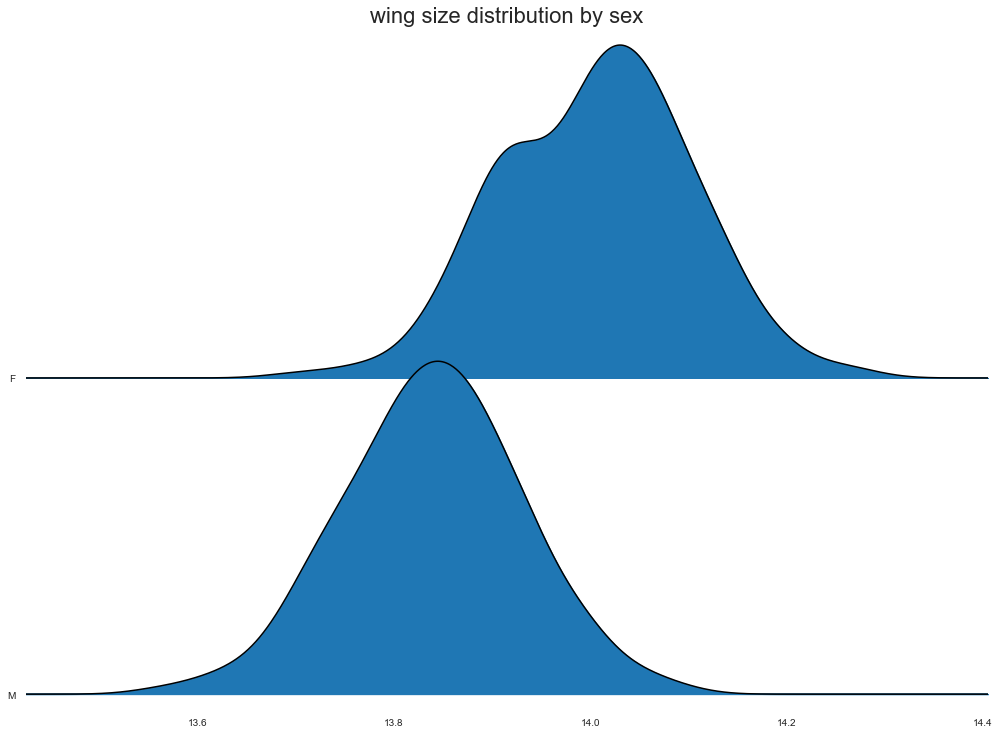

In [94]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df_exp_fed_groupmean, column='lnwing', by=['sex'], ylim='own', figsize=(14,10))

# Decoration
plt.title('wing size distribution by sex', fontsize=22)
plt.show()

In [96]:
Fwing= df_exp_fed_groupmean[(df_exp_fed_groupmean['sex'] == "F")]

F = stats.shapiro(Fwing['lnwing'])
F

(0.9945470094680786, 0.7071972489356995)

In [97]:
Mwing= df_exp_fed_groupmean[(df_exp_fed_groupmean['sex'] == "M")]

M = stats.shapiro(Mwing['lnwing'])
M

(0.9981694221496582, 0.9988638758659363)

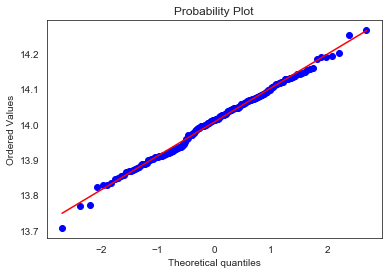

In [98]:
import numpy as np 
import pylab 
import scipy.stats as stats

  
stats.probplot(Fwing['lnwing'], dist="norm", plot=pylab)
pylab.show()

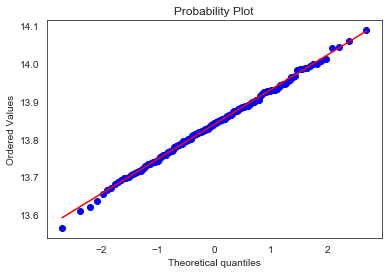

In [99]:
stats.probplot(Mwing['lnwing'], dist="norm", plot=pylab)
pylab.show()

NameError: name 'df_exp_fed_groupmean' is not defined

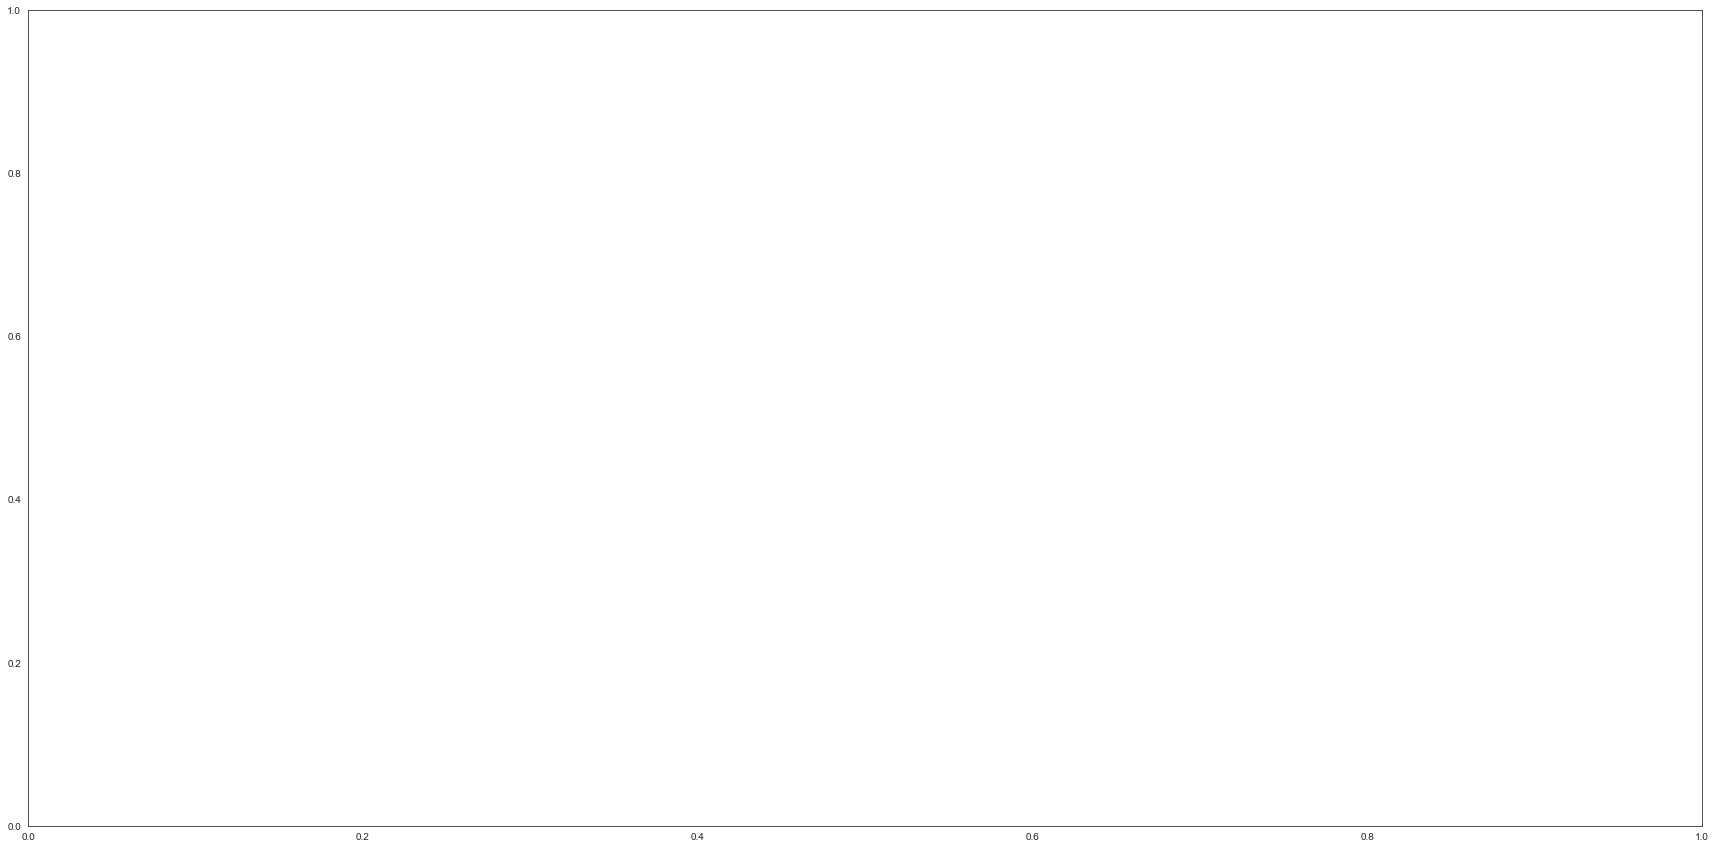

In [17]:
#I want to sort the Female values and reindex the lines by sorted female value, then use the order new order of lines to plot the graph
# or I want to sort the lines by SSD increasing

#plot representing the paired wing size average per line
fig, ax = plt.subplots(figsize=(30, 15))

# Set up list to track sites
lines = []
i = 10
for line, subdf in df_exp_fed_groupmean.groupby("line"):
    lines.append(line)
    # Get the values for male and female wings
    F = subdf.query('sex == "F"')['lnwing'].values
    M = subdf.query('sex == "M"')['lnwing'].values
    
    #print(F)

    # Set up the x-axis values
    x1 = i #- .1
    x2 = i #+ .1

    # Plot the lines connecting the dots
    for Fi, Mi in zip(F,M):
        ax.plot([x1, x2], [ Fi, Mi], c='gray',linewidth=0.5)

    # Plot the points
    ax.scatter(len(M)*[x1-0.01], M, c='#67a9cf',
               s=15, label='Male')
    ax.scatter(len(F)*[x2+0.01], F, c='#ef8a62', 
               s=15, label='Female')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(lines, fontsize='xx-large')

### Hypothesis 2: However, the difference between females and males varies among lines (SSD genetic variation exists)

#### Some lines have signicantly female biased SSD

#### Some lines do not have significant SSD

#### Some lines have signicantly male biased SSD

### Hypothesis 3: Female size variation among lines is responsible for SSD variation

### Hypothesis 4: If we now look at different environments, SSD responds to the environment and we hypothesize that it is decreased when there is starvation.

In [48]:
# Is there a difference in SSD for each treatment?


### Hypothesis 5: However, SSD doesn't change by different degrees of starvation, SSD is the same when we starve larvae for 1 or 2 days.

In [42]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

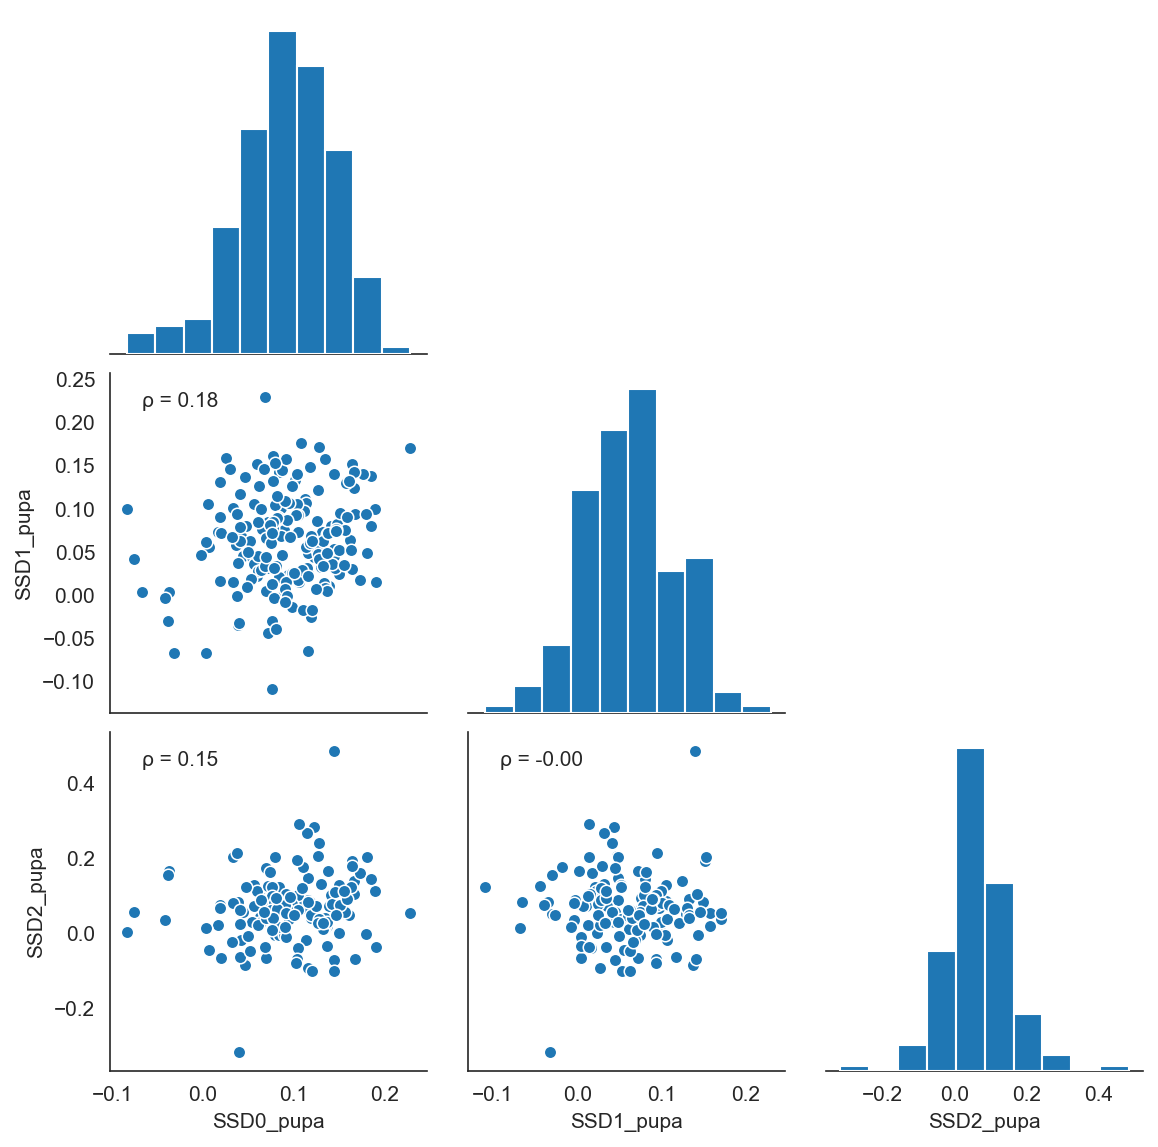

In [43]:
g = sns.pairplot(SSD012df[['SSD0_pupa', 'SSD1_pupa','SSD2_pupa']],corner=True)
g.map_lower(corrfunc)
plt.show()

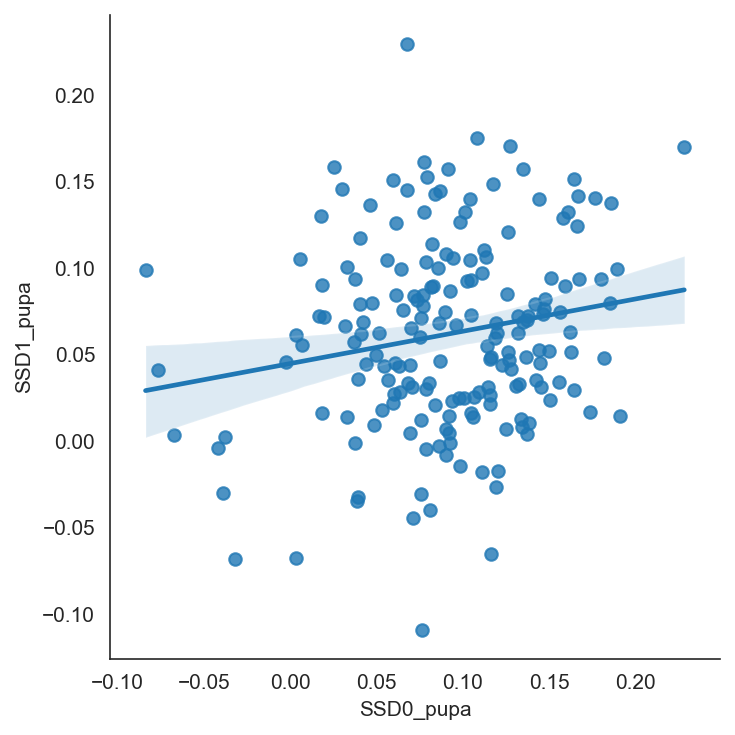

In [44]:
sns.lmplot(x="SSD0_pupa", y="SSD1_pupa", data=SSD012df)

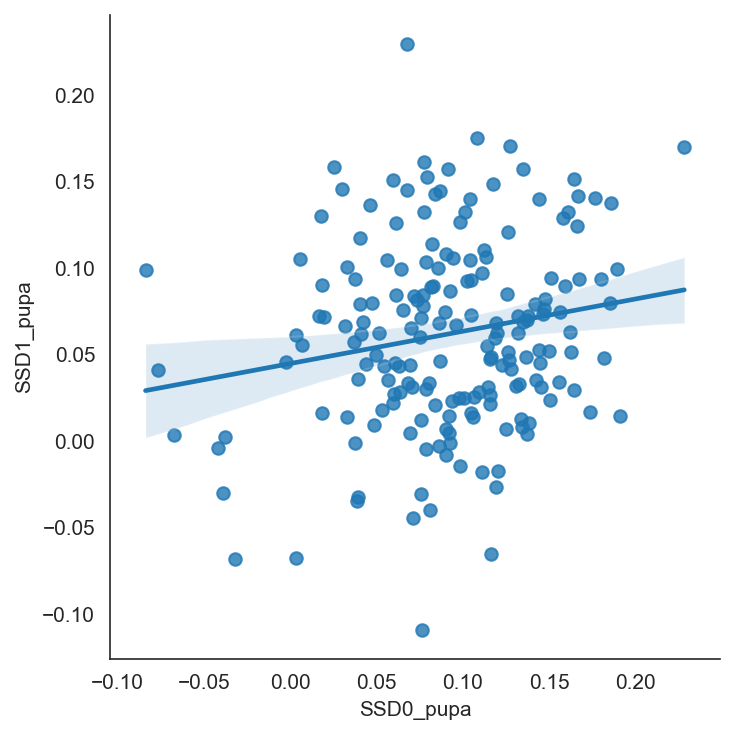

In [45]:
sns.lmplot(x="SSD0_pupa", y="SSD1_pupa", data=SSD012df)

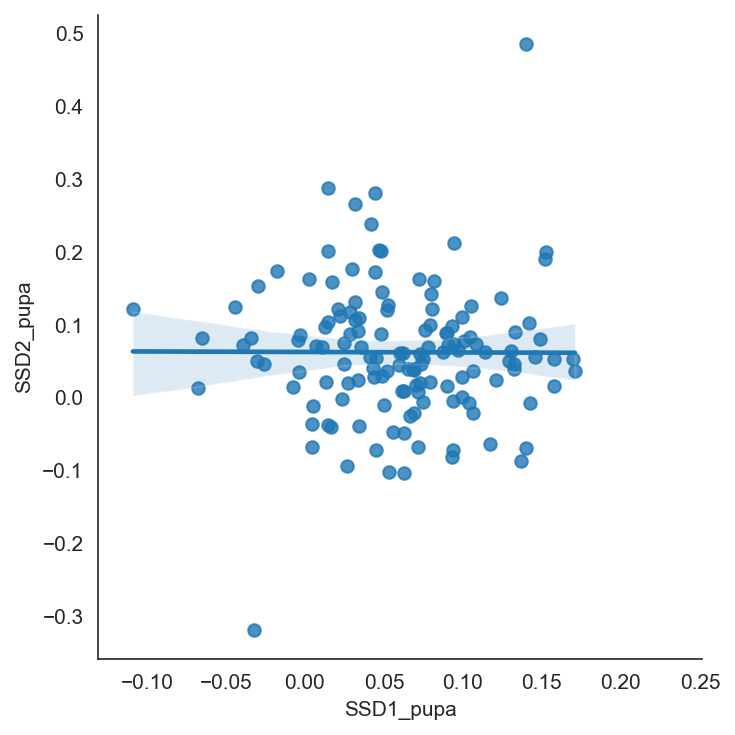

In [46]:
sns.lmplot(x="SSD1_pupa", y="SSD2_pupa", data=SSD012df)

## If we look at sex specific plasticity (SSP)

### Hypothesis 6: Plasticity in female is higher than plasticity in male, this is due to a large negative response in females

### Hypothesis 7: But this SSP varies among lineages

#### And some lineages have no SSP

#### Some have female biased SSP : where female wing size changes a more

### Some have male biased SSP: where male size changes more

### This variation in SSP is correlated with the variation of SSD: if SSD is larger, SSP will be larger

### But is this correlation due to female biased SSP and SSD? Meaning that the correlation present when both SSP and SSD are female biased?

# Estimate how much of the environment is responsible for female size variation as opposed to how much of the variation due to the actual size genetic variation

In [11]:
df_exp.head()

,id,control_experiment,line,block,day_of_starvation,sex,wing,cell,leg,pupa,legpow2,lnwing,lnleg,lnlegpow2,lnpupa
0,365-A-0-F-031,EXPERIMENT,365,5,0,F,1430392.0,78.0,1001.2890,NaN,1.002580e+06,14.173459,6.909043,13.818087,NaN
1,365-A-1-M-045,EXPERIMENT,365,5,1,M,893533.5,89.0,838.3077,NaN,7.027598e+05,13.702939,6.731385,13.462770,NaN
2,712-A-0-F-013,EXPERIMENT,712,5,0,F,1270679.0,73.0,982.3140,NaN,9.649408e+05,14.055062,6.889911,13.779822,NaN
3,774-B-0-F-055,EXPERIMENT,774,5,0,F,1523000.0,81.0,991.0491,NaN,9.821783e+05,14.236193,6.898764,13.797528,NaN
4,774-B-2-F-094,EXPERIMENT,774,5,2,F,1104017.0,86.0,867.8839,NaN,7.532225e+05,13.914466,6.766058,13.532116,NaN


In [15]:
#subset female 
df_exp_F = df_exp[(df_exp['sex']=='F')]
#average pupa size by lineage
df_exp_F_mean = df_exp_F.groupby(['line'], as_index=False).lnpupa.mean()
df_exp_F_mean.head()

,line,lnpupa
0,21,14.454189
1,26,14.506856
2,28,14.616968
3,31,14.487273
4,32,14.407979


In [16]:
df_exp_F_mean.to_csv("Sept2020/df_exp_F_mean.csv")

In [50]:
# Calculate plasticity of female between Day 0 and Day 1
#subset female data and day 0 and day 1
df_exp_F_0 = df_exp_F[(df_exp_F['day_of_starvation'] ==0)]
df_exp_F_1 = df_exp_F[(df_exp_F['day_of_starvation'] ==1)]


In [52]:

#subset by lineage

line = np.unique(df_exp_F_1[['line']]) 
plasticity_list = []
line_list = []

#loop
for i in line:

    line_list.append(i)

    D0 = df_exp_F_0[(df_exp_F_0['line'] == i)]
    pupaD0 = D0['lnpupa'].values[0]

    D1 = df_exp_F_1[(df_exp_F_1['line'] == i)]
    pupaD1 = D1['lnpupa'].values[0]

    plasticity_list.append(pupaD0-pupaD1)


In [53]:
plasticity_F_01 = {'line':line_list,'pupa_F_01':plasticity_list} #D0-D1
plasticity_F_01df = pd.DataFrame(plasticity_F_01)
plasticity_F_01df.head()

,line,pupa_F_01
0,21,0.076699
1,26,0.380529
2,28,0.073901
3,31,0.363049
4,32,0.367442


In [54]:
#merge with mean body size female

df_exp_F_mean.head()

,line,lnpupa
0,21,14.454189
1,26,14.506856
2,28,14.616968
3,31,14.487273
4,32,14.407979


In [56]:
F_pupasize_plasticity01 = plasticity_F_01df.merge(df_exp_F_mean)

In [ ]:
F_pupasize_plasticity01.to_csv()

Now that we have established that a variation of SSP and SSD is generally dues to female changes in size, is it the case if we examine specific traits?

## Trait Specific

In [ ]:
### Wing

In [ ]:
#summary of wing size
#df_exp.groupby(['day_of_starvation','sex'], as_index=False).lnwing.describe()

In [31]:
df_exp_fed_wing = df_exp_fed[(df_exp_fed['lnwing'] >=12)]


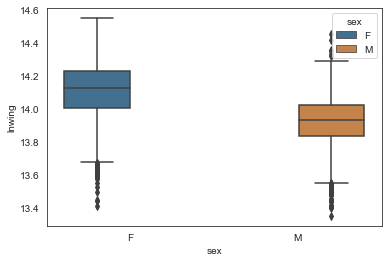

In [33]:
# make box plot of male and female wing size


sns.boxplot(x = 'sex', y = 'lnwing', data=df_exp_fed_wing, hue='sex', saturation=.5)
plt.show()

In [ ]:
### Leg

In [ ]:
#summary of leg wize
#df_exp.groupby(['day_of_starvation','sex'], as_index=False).lnlegpow2.describe()